In [1]:
%cd /content/drive/MyDrive/github_projects/openweather-pyspark-nosql

/content/drive/MyDrive/github_projects/openweather-pyspark-nosql


In [2]:
!git pull origin main

From https://github.com/lobobranco96/openweather-pyspark-nosql
 * branch            main       -> FETCH_HEAD
Already up to date.


In [ ]:
!sudo apt install tree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (74.0 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tree.
(Reading database ... 126102 files and directories currently instal

In [ ]:
!tree -L 3

.
├── data
│   ├── processed
│   │   └── ano=2025
│   └── raw
│       └── ano=2025
├── docker
│   ├── airflow
│   │   ├── Dockerfile
│   │   └── requirements.txt
│   └── notebook
│       ├── Dockerfile
│       └── requirements.txt
├── info.txt
├── mnt
│   ├── airflow
│   │   └── dags
│   ├── notebook
│   │   └── notebook_teste.ipynb
│   └── python
│       ├── coletor_weather.py
│       ├── __init__.py
│       ├── load_weather_mongo.py
│       ├── __pycache__
│       └── transformador_weather.py
├── README.md
└── services
    ├── applications.yml
    └── orchestration.yml

15 directories, 13 files


In [ ]:
!pip install pyspark findspark

In [ ]:
!rm -rf "/content/drive/MyDrive/github_projects/openweather-pyspark-nosql/data/processed"

In [ ]:
from mnt.python.coletor_weather import ColetorWeather

# Lista de cidades (ex: capitais)
cidades = [
    'Rio Branco,BR',        # Acre (AC)
    'Maceió,BR',               # Alagoas (AL)
    'Macapá,BR',               # Amapá (AP)
    'Manaus,BR',               # Amazonas (AM)
    'Salvador,BR',             # Bahia (BA)
    'Fortaleza,BR',            # Ceará (CE)
    'Brasília,BR',             # Distrito Federal (DF)
    'Vitória,BR',              # Espírito Santo (ES)
    'Goiânia,BR',              # Goiás (GO)
    'São Luís,BR',             # Maranhão (MA)
    'Cuiabá,BR',               # Mato Grosso (MT)
    'Campo Grande,BR',         # Mato Grosso do Sul (MS)
    'Belo Horizonte,BR',       # Minas Gerais (MG)
    'Belém,BR',                # Pará (PA)
    'João Pessoa,BR',          # Paraíba (PB)
    'Curitiba,BR',             # Paraná (PR)
    'Recife,BR',               # Pernambuco (PE)
    'Teresina,BR',             # Piauí (PI)
    'Rio de Janeiro,BR',       # Rio de Janeiro (RJ)
    'Natal,BR',                # Rio Grande do Norte (RN)
    'Porto Alegre,BR',         # Rio Grande do Sul (RS)
    'Porto Velho,BR',          # Rondônia (RO)
    'Boa Vista,BR',            # Roraima (RR)
    'Florianópolis,BR',        # Santa Catarina (SC)
    'São Paulo,BR',            # São Paulo (SP)
    'Aracaju,BR',              # Sergipe (SE)
    'Palmas,BR'                # Tocantins (TO)
]

# Instancia e coleta
extract = ColetorWeather(cidades)
dados = extract.coletar()

# Salvar dados
extract.salvar_jsons(dados)

Coletado: Rio Branco,BR
Coletado: Maceió,BR
Coletado: Macapá,BR
Coletado: Manaus,BR
Coletado: Salvador,BR
Coletado: Fortaleza,BR
Coletado: Brasília,BR
Coletado: Vitória,BR
Coletado: Goiânia,BR
Coletado: São Luís,BR
Coletado: Cuiabá,BR
Coletado: Campo Grande,BR
Coletado: Belo Horizonte,BR
Coletado: Belém,BR
Coletado: João Pessoa,BR
Coletado: Curitiba,BR
Coletado: Recife,BR
Coletado: Teresina,BR
Coletado: Rio de Janeiro,BR
Coletado: Natal,BR
Coletado: Porto Alegre,BR
Coletado: Porto Velho,BR
Coletado: Boa Vista,BR
Coletado: Florianópolis,BR
Coletado: São Paulo,BR
Coletado: Aracaju,BR
Coletado: Palmas,BR
Total de cidades coletadas: 27
Arquivos salvos em: /content/drive/MyDrive/github_projects/openweather-pyspark-nosql/data/raw/ano=2025/mes=05/dia=24/hora=15


In [ ]:
import json
import pandas as pd

with open('/content/drive/MyDrive/github_projects/openweather-pyspark-nosql/data/raw/ano=2025/mes=05/dia=24/hora=15/clima_Rio_de_Janeiro_2025-05-24_15-48-13.json', 'r', encoding='utf-8') as f:
    dados = json.load(f)

df = pd.json_normalize(dados)

display(df)

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,main.sea_level,main.grnd_level,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000,1748101395,-10800,3451190,Rio de Janeiro,200,-43.2075,-22.9028,...,1023,1024,1.54,350,75,2,2098643,BR,1748078576,1748117806


In [ ]:
from mnt.python.transformador_weather import TransformadorClima

#spark = SparkSession.builder.appName("TransformadorClima").getOrCreate()
transformador = TransformadorClima()

df_raw = transformador.ler_json("data/raw/ano=2025/mes=05/dia=24/hora=15")
df_transformado = transformador.transformar(df_raw)
transformador.salvar_parquet(df_transformado)


Dados salvos em: data/processed/ano=2025/mes=05/dia=24/hora=15


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("LeituraParquet").getOrCreate()

# Caminho onde estão os arquivos parquet
caminho = "data/processed/ano=2025/mes=05/dia=24/hora=15"

df = spark.read.parquet(caminho)
df.show()

+--------------+----------+-----------+-------+----------------+-----------------+-------------------+-----------------+--------------------+
|        cidade| timestamp|temperatura|umidade|velocidade_vento|  descricao_clima|          data_hora|faixa_temperatura|         data_coleta|
+--------------+----------+-----------+-------+----------------+-----------------+-------------------+-----------------+--------------------+
|      Salvador|1748101691|      26.98|     74|            5.63|céu pouco nublado|2025-05-24 15:48:11|        Agradável|2025-05-24 15:49:...|
|Rio de Janeiro|1748101395|      22.05|     80|            1.54| nuvens quebradas|2025-05-24 15:43:15|        Agradável|2025-05-24 15:49:...|
|Belo Horizonte|1748101578|      24.46|     60|             3.6| nuvens dispersas|2025-05-24 15:46:18|        Agradável|2025-05-24 15:49:...|
|   João Pessoa|1748101692|      29.13|     74|            4.63| nuvens quebradas|2025-05-24 15:48:12|        Agradável|2025-05-24 15:49:...|
|    R

In [ ]:
%cd /content/drive/MyDrive/github_projects/openweather-pyspark-nosql

/content/drive/MyDrive/github_projects/openweather-pyspark-nosql


In [ ]:
from mnt.python.load_weather_mongo import LoadMongo
from dotenv import load_dotenv
import os

MONGO_URI = os.getenv("MONGO_URI")
DATABASE = "clima"
COLLECTION = "dados"

mongo_loader = LoadMongo(MONGO_URI, DATABASE, COLLECTION)

df = mongo_loader.ler_parquet("data/processed/ano=2025/mes=05/dia=24/hora=15")
mongo_loader.escrever_mongodb(df)
mongo_loader.stop()



TESTE

In [ ]:
!pip install pymongo[srv] dnspython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.1 MB/s eta 0:00:00


In [ ]:
%cd /content/drive/MyDrive/github_projects/openweather-pyspark-nosql

/content/drive/MyDrive/github_projects/openweather-pyspark-nosql


In [ ]:
from dotenv import load_dotenv
import os
from pyspark.sql import SparkSession
from pymongo import MongoClient

# Carrega variáveis do .env
load_dotenv()
MONGO_URI = os.getenv("MONGO_URI")

client = MongoClient(MONGO_URI)
db = client.clima
collection = db.dados

spark = SparkSession.builder \
    .appName("MongoSparkConnector") \
    .config("spark.mongodb.write.connection.uri", MONGO_URI) \
    .getOrCreate()

print(spark)

# Busca todos os documentos da coleção (ou aplique filtros)
docs = list(collection.find({}, {"_id": 0}))  # Excluir _id

df = spark.createDataFrame(docs)
df.show()
spark.stop()


+--------------+--------------------+-------------------+-----------------+-----------------+-----------+----------+-------+----------------+
|        cidade|         data_coleta|          data_hora|  descricao_clima|faixa_temperatura|temperatura| timestamp|umidade|velocidade_vento|
+--------------+--------------------+-------------------+-----------------+-----------------+-----------+----------+-------+----------------+
|      Salvador|2025-05-24 15:49:...|2025-05-24 15:48:11|céu pouco nublado|        Agradável|      26.98|1748101691|     74|            5.63|
|Rio de Janeiro|2025-05-24 15:49:...|2025-05-24 15:43:15| nuvens quebradas|        Agradável|      22.05|1748101395|     80|            1.54|
|Belo Horizonte|2025-05-24 15:49:...|2025-05-24 15:46:18| nuvens dispersas|        Agradável|      24.46|1748101578|     60|             3.6|
|   João Pessoa|2025-05-24 15:49:...|2025-05-24 15:48:12| nuvens quebradas|        Agradável|      29.13|1748101692|     74|            4.63|
|    R

In [ ]:
from pymongo import MongoClient
from dotenv import load_dotenv
import os
load_dotenv()

MONGO_URI = os.getenv("MONGO_URI")
client = MongoClient(MONGO_URI)
db = client.clima
collection = db.dados

collection.drop()

print(MONGO_URI)

In [ ]:
# Instalar Streamlit e pyngrok
!pip install streamlit pyngrok

# Escrever o código do Streamlit
%%writefile app.py
import streamlit as st

st.title("Exemplo de Streamlit no Google Colab")
st.write("Olá, esse é um exemplo simples de Streamlit rodando no Google Colab!")

# Usar pyngrok para expor o servidor Streamlit
from pyngrok import ngrok

# Expor a porta 8501 (porta padrão do Streamlit) via ngrok
public_url = ngrok.connect(8501)

# Rodar o Streamlit
!streamlit run app.py &

# Exibir a URL pública gerada
print('Acesse o aplicativo Streamlit aqui:', public_url)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


UsageError: Line magic function `%%writefile` not found.


In [ ]:
%cd /content/drive/MyDrive/github_projects/openweather-pyspark-nosql

/content/drive/MyDrive/github_projects/openweather-pyspark-nosql


In [ ]:
from dotenv import load_dotenv
import os
# Carrega variáveis do .env
load_dotenv()
ngrok_token = os.getenv("NGROK")
!ngrok config add-authtoken ngrok_token

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
https://dashboard.ngrok.com/endpoints/agent/ep_2xYcsI6gjI9tldCgDA6D7zwtJfy/traffic-policy/editor

In [ ]:
from pyngrok import ngrok

# Expor a porta 8501 (padrão do Streamlit) via ngrok
public_url = ngrok.connect(8501)

# Rodar o Streamlit
!streamlit run tests/app.py &

# Exibir a URL pública gerada
print('Acesse o aplicativo Streamlit aqui:', public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.183.164:8501

2025-05-24 20:46:05.123 Serialization of dataframe to Arrow table was unsuccessful. Applying automatic fixes for column types to make the dataframe Arrow-compatible.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/dataframe_util.py", line 822, in convert_pandas_df_to_arrow_bytes
    table = pa.Table.from_pandas(df)
            ^^^^^^^^^^^^^^^^^^^^^^^^
  File "pyarrow/table.pxi", line 4751, in pyarrow.lib.Table.from_pandas
  File "/usr/local/lib/python3.11/dist-packages/pyarrow/pandas_compat.py", line 625, in dataframe_to_arrays
    arrays = [convert_column(c, f)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pyarrow/pandas_compat.py", line 625, in <listcomp>
    arrays = [convert_column(c, f)
              ^^^^^^^^^^^^^^^^^^^^
  Fil

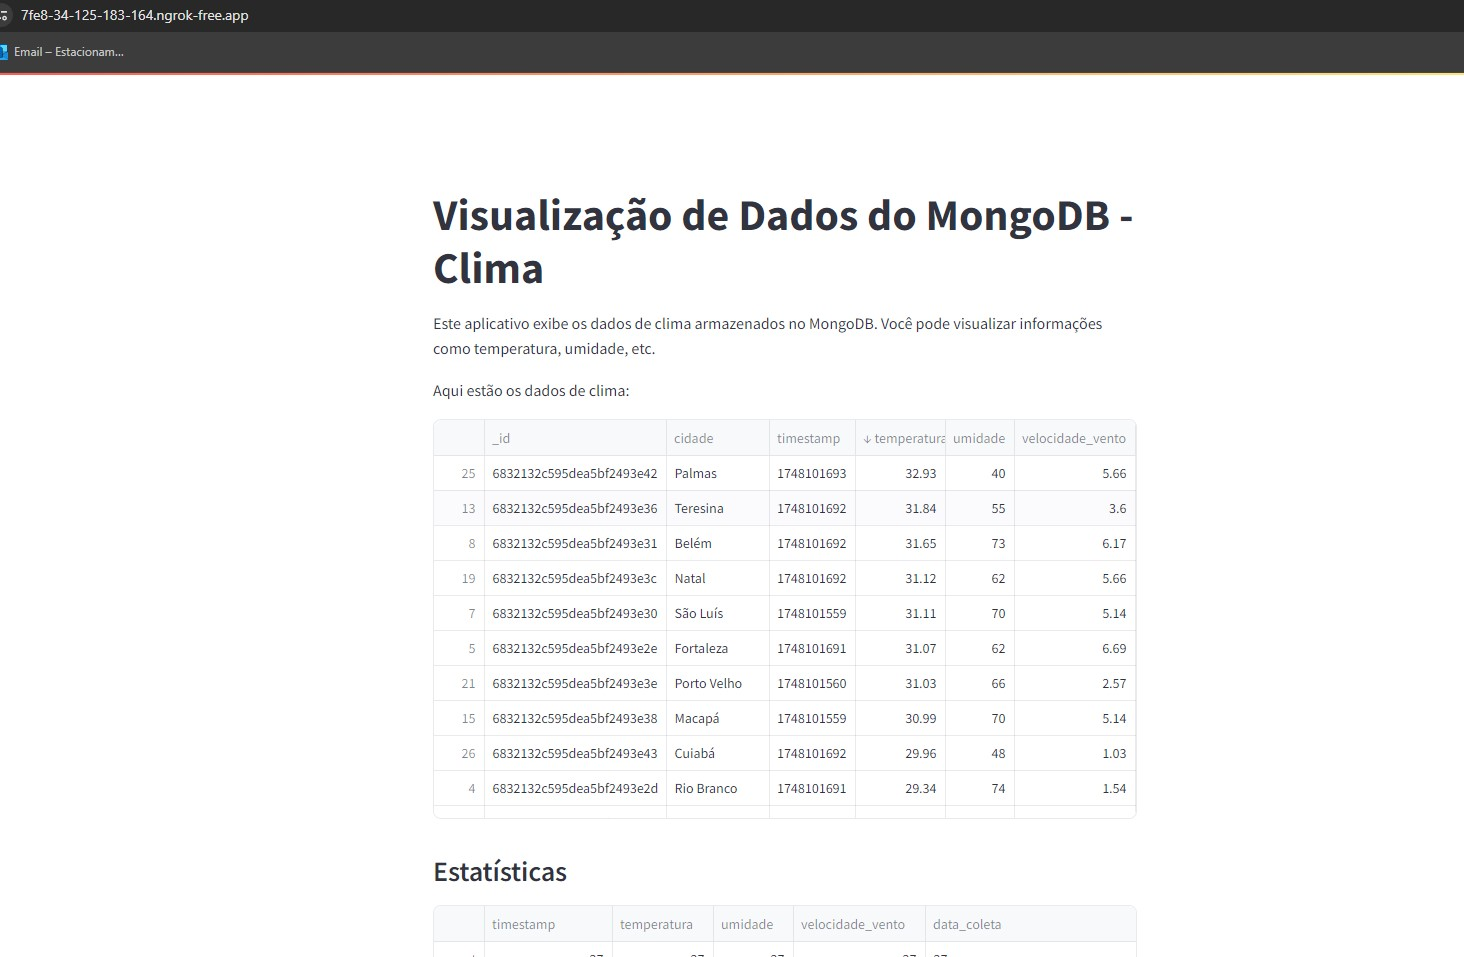

**APP EXTRAINDO, TRANSFORMANDO E CARREGANDO DADOS NO MONGODB**
- DE FORMA AGENDADA A CADA 1HORA, É INICIADA A PIPELINE  DE ETL

In [26]:
!pip install pyspark==3.5.1
!pip install pandas==2.2.2
!pip install pymongo==4.6.3,
!pip install python-dotenv==1.0.1
!pip install schedule

In [4]:
%cd /content/drive/MyDrive/github_projects/openweather-pyspark-nosql
from mnt.python_scripts.coletor_weather import ColetorWeather
from mnt.python_scripts.transformador_weather import TransformadorClima
from mnt.python_scripts.load_weather_mongo import LoadMongo
from dotenv import load_dotenv
import os
import schedule
import time

/content/drive/MyDrive/github_projects/openweather-pyspark-nosql


In [5]:
%cd /content/drive/MyDrive/github_projects/openweather-pyspark-nosql/mnt/notebook

/content/drive/MyDrive/github_projects/openweather-pyspark-nosql/mnt/notebook


In [6]:
def pipeline(CIDADES, API_KEY, MONGO_URI, DATABASE, COLLECTION):

    def extract():
        try:
            print("🔄 Iniciando etapa: EXTRACT")
            extract = ColetorWeather(CIDADES, API_KEY)
            dados = extract.coletar()
            path = extract.salvar_jsons(dados)
            print("✅ Etapa EXTRACT finalizada com sucesso.")
            return path
        except Exception as e:
            print(f"❌ Erro na etapa EXTRACT: {e}")
            raise

    def transform(data_path_json):
        try:
            print("🔄 Iniciando etapa: TRANSFORM")
            transformador = TransformadorClima()
            df_raw = transformador.ler_json(data_path_json)
            df_transformado = transformador.transformar(df_raw)
            path = transformador.salvar_parquet(df_transformado)
            print("✅ Etapa TRANSFORM finalizada com sucesso.")
            return path
        except Exception as e:
            print(f"❌ Erro na etapa TRANSFORM: {e}")
            raise

    def load(data_path_parquet):
        try:
            print("🔄 Iniciando etapa: LOAD")
            mongo_loader = LoadMongo(MONGO_URI, DATABASE, COLLECTION)
            df = mongo_loader.ler_parquet(data_path_parquet)
            mongo_loader.escrever_mongodb(df)
            mongo_loader.stop()
            print("✅ Etapa LOAD finalizada com sucesso.")
        except Exception as e:
            print(f"❌ Erro na etapa LOAD: {e}")
            raise

    try:
        data_path_json = extract()
        data_path_parquet = transform(data_path_json)
        load(data_path_parquet)
    except Exception as e:
        print("🚨 Pipeline encerrada com erro.")


In [ ]:
def main_pipeline():
    load_dotenv()
    CIDADES = [
        'Rio Branco,BR', 'Maceió,BR', 'Macapá,BR', 'Manaus,BR', 'Salvador,BR',
        'Fortaleza,BR', 'Brasília,BR', 'Vitória,BR', 'Goiânia,BR', 'São Luís,BR',
        'Cuiabá,BR', 'Campo Grande,BR', 'Belo Horizonte,BR', 'Belém,BR',
        'João Pessoa,BR', 'Curitiba,BR', 'Recife,BR', 'Teresina,BR',
        'Rio de Janeiro,BR', 'Natal,BR', 'Porto Alegre,BR', 'Porto Velho,BR',
        'Boa Vista,BR', 'Florianópolis,BR', 'São Paulo,BR', 'Aracaju,BR',
        'Palmas,BR'
    ]
    API_KEY = os.getenv("API_KEY")
    MONGO_URI = os.getenv("MONGO_URI")
    DATABASE = "clima"
    COLLECTION = "dados"

    # Chamada da sua função principal aqui
    pipeline(CIDADES, API_KEY, MONGO_URI, DATABASE, COLLECTION)

if __name__ == "__main__":
    print("Iniciando a execução a cada 1 hora...")

    # Loop que mantém o script rodando e executando
    while True:
        print("🔁 Executando pipeline...")
        print("============================================")
        main_pipeline()
        print("============================================")
        print("✅ Aguardando 3600 segundos para próxima execução...\n")
        time.sleep(3600) #(1 hora)

Iniciando a execução a cada 1 hora...
🔁 Executando pipeline...
🔄 Iniciando etapa: EXTRACT
✅ Etapa EXTRACT finalizada com sucesso.
🔄 Iniciando etapa: TRANSFORM
✅ Etapa TRANSFORM finalizada com sucesso.
🔄 Iniciando etapa: LOAD
✅ Etapa LOAD finalizada com sucesso.
✅ Aguardando 3600 segundos para próxima execução...



In [12]:
!rm -rf "/content/drive/MyDrive/github_projects/openweather-pyspark-nosql/data/raw/ano=2025/mes=05/dia=28/hora=12"
!rm -rf "/content/drive/MyDrive/github_projects/openweather-pyspark-nosql/data/processed/ano=2025/mes=05/dia=28/hora=12"